# Importing Libraries

In [1]:
import keras
import PIL

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.layers import Activation, BatchNormalization

# Initializing & Building the CNN

In [3]:
model = Sequential()

In [4]:
model.add(Conv2D(32, (3,3) ,input_shape=(64, 64, 3), activation='relu')) #Convolution
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2))) #Pooling
model.add(Dropout(0.25))

In [5]:
model.add(Conv2D(32, (3, 3), activation='relu')) #Convolution
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2))) #Pooling
model.add(Dropout(0.25))

In [6]:
model.add(Flatten())

In [7]:
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(units=2, activation='softmax'))

# Compiling the Model

In [8]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)       

# Initializing EarlyStopping & Reduce-LR-On-Plateau

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [11]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.00005)

callbacks = [earlystop, learning_rate_reduction]

# Fitting images in the CNN

In [12]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Training Dataset
training_set = training_datagen.flow_from_directory('dataset/training_set/', 
                                                    target_size=(64,64),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [14]:
# Testing Dataset
validation_set = validation_datagen.flow_from_directory('dataset/test_set/', 
                                                target_size=(64,64), 
                                                batch_size=32, 
                                                class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [15]:
FAST_RUN = False
epochs=5 if FAST_RUN else 30

In [16]:
history = model.fit_generator(training_set, 
                              steps_per_epoch=8000//32, 
                              epochs=epochs,
                              validation_data=validation_set, 
                              validation_steps=2000//32,
                              callbacks=callbacks)

Epoch 1/30
250/250 [==============================] - 58s 232ms/step - loss: 0.9123 - accuracy: 0.5921 - val_loss: 0.9973 - val_accuracy: 0.5156
Epoch 2/30
250/250 [==============================] - 56s 223ms/step - loss: 0.6762 - accuracy: 0.6355 - val_loss: 0.7007 - val_accuracy: 0.5493
Epoch 3/30
250/250 [==============================] - 56s 225ms/step - loss: 0.6010 - accuracy: 0.6783 - val_loss: 0.6174 - val_accuracy: 0.6352
Epoch 4/30
250/250 [==============================] - 58s 231ms/step - loss: 0.5859 - accuracy: 0.6904 - val_loss: 0.5117 - val_accuracy: 0.7139
Epoch 5/30
250/250 [==============================] - 58s 234ms/step - loss: 0.5619 - accuracy: 0.7071 - val_loss: 0.5502 - val_accuracy: 0.7215
Epoch 6/30
250/250 [==============================] - 60s 239ms/step - loss: 0.5351 - accuracy: 0.7320 - val_loss: 0.4607 - val_accuracy: 0.6860

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
Epoch 7/30
250/250 [=============================

In [17]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

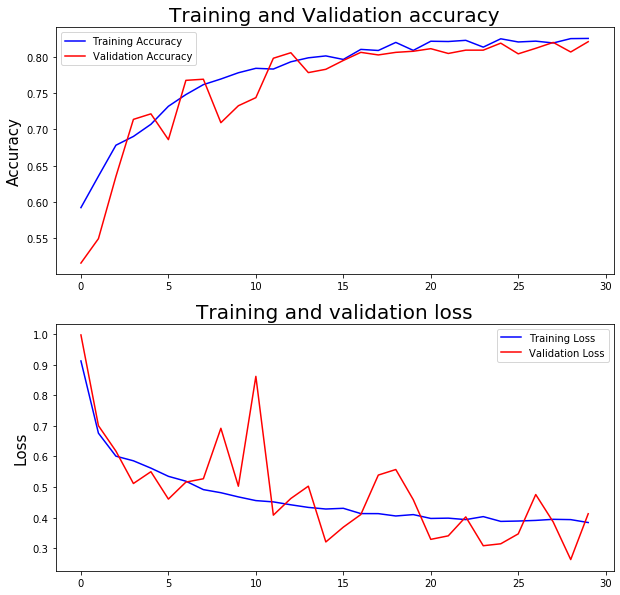

In [18]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()

plt.show()

In [19]:
print("Accuracy Score:" , round(accuracy[-1]*100))

Accuracy Score: 83.0


In [21]:
model.save('MODEL')